In [1]:
import nldi_xstool
import geopandas

%matplotlib inline
from nldi_xstool.XSGen import XSGen
from nldi_xstool.ancillary import query_dems_bbox
import py3dep
from pynhd import NLDI, NHDPlusHR, WaterData
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import dataretrieval.nwis as nwis
#try:
#    from nldi_xstool.__openChannel import flowEst
#except ImportError:
#    from .__openChannel import flowEst



/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
# https://waterdata.usgs.gov/nwis/inventory?agency_code=USGS&site_no=11114495

gagebasin = NLDI().get_basins("11114495").to_crs('epsg:3857')

In [3]:
gageloc = NLDI().getfeature_byid("nwissite", "USGS-11114495").to_crs('epsg:3857')
gageloc

,,geometry,type,source,sourceName,identifier,name,uri,comid,reachcode,measure,navigation
USGS-11114495,0,POINT (-13286798.233 4096513.112),hydrolocation,nwissite,NWIS Surface Water Sites,USGS-11114495,MATILIJA C NR RES NR MATILIJA HOT SPRINGS CA,https://waterdata.usgs.gov/monitoring-location...,17585808,18070101000072,58.2233700000,https://labs.waterdata.usgs.gov/api/nldi/linke...


<AxesSubplot:>

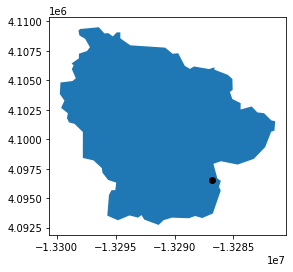

In [4]:
ax = plt.subplot(111)
gagebasin.plot(ax=ax)
gageloc.plot(ax=ax, color='black')

In [5]:
gagebasin = NLDI().get_basins("11114495").to_crs('epsg:3857')
gageloc = NLDI().getfeature_byid("nwissite", "USGS-11114495").to_crs('epsg:3857')
cid = gageloc.comid.values.astype(str)
print(cid,gageloc.comid.values.astype(int)[0], cid[0]) 
# strmseg_basin = NLDI().getfeature_byid("comid", cid[0], basin=True).to_crs('epsg:3857')
strmseg_loc = NLDI().getfeature_byid("comid", cid[0]).to_crs('epsg:3857')

['17585808'] 17585808 17585808


In [6]:

gageloc


,,geometry,type,source,sourceName,identifier,name,uri,comid,reachcode,measure,navigation
USGS-11114495,0,POINT (-13286798.233 4096513.112),hydrolocation,nwissite,NWIS Surface Water Sites,USGS-11114495,MATILIJA C NR RES NR MATILIJA HOT SPRINGS CA,https://waterdata.usgs.gov/monitoring-location...,17585808,18070101000072,58.2233700000,https://labs.waterdata.usgs.gov/api/nldi/linke...


In [7]:
strmseg_loc

,,geometry,type,source,sourceName,identifier,name,uri,comid,navigation
17585808,0,"LINESTRING (-13287323.918 4096638.669, -132872...",,comid,NHDPlus comid,17585808,,,17585808,https://labs.waterdata.usgs.gov/api/nldi/linke...


In [8]:


len(strmseg_loc.geometry[0].coords)



14

In [9]:
strmseg_loc.geometry[0].coords

14


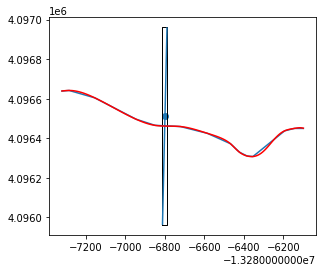

In [10]:



# print(geomfeat.head(), geom2afeat.head())
xs = XSGen(point=gageloc, cl_geom=strmseg_loc, ny=101, width=1000, tension=0.5)
xs_line = xs.get_xs()
ax = plt.subplot(111)
gageloc.plot(ax=ax)
strmseg_loc.plot(ax=ax)
xs_line.plot(ax=ax)
xs.get_strm_seg_spline().plot(ax=ax, colors='r')
xs_line.envelope.plot(ax=ax, facecolor="none", edgecolor='black')
plt.show()



In [35]:
xs.get_strm_seg_spline()

,name,geometry
0,strm_seg_spline,"LINESTRING (-13287323.918 4096638.669, -132873..."


In [11]:


print(type(xs_line.envelope.bounds))
print(xs_line.envelope.bounds)
print(strmseg_loc.to_crs('epsg:4326'))



<class 'pandas.core.frame.DataFrame'>
           minx          miny          maxx          maxy
0 -1.328681e+07  4.095962e+06 -1.328679e+07  4.096962e+06
                                                     geometry type source  \
17585808 0  LINESTRING (-119.36206 34.50370, -119.36170 34...       comid   

               sourceName identifier name uri     comid  \
17585808 0  NHDPlus comid   17585808           17585808   

                                                   navigation  
17585808 0  https://labs.waterdata.usgs.gov/api/nldi/linke...  


In [12]:


xs_line_geom = xs_line.to_crs('epsg:4326')
print(xs_line_geom)
bbox = xs_line_geom.geometry[0].envelope.bounds
print(bbox)
query = query_dems_bbox(bbox)
print(query)



            name                                           geometry
0  cross-section  LINESTRING (-119.35746 34.49869, -119.35746 34...
(-119.3574606710691, 34.49868767885272, -119.3572555355385, 34.50608878780323)
{'res_1m': True, 'res_3m': False, 'res_5m': False, 'res_10m': True, 'res_30m': True, 'res_60m': False}


In [13]:


bbox = xs_line.geometry[0].bounds



In [14]:


width = abs(bbox[0]-bbox[2])
height = abs(bbox[1]-bbox[3])
print(width, height)



22.835582811385393 999.7392340796068


In [15]:


bb = xs_line.buffer(100)
bb.geometry[0].bounds



(-13286911.718205, 4095861.8051115745, -13286688.934775373, 4097061.49219247)

In [16]:


bb1 = (xs_line.total_bounds) - ((100., 100., -100., -100.))
tuple(bb1)



(-13286911.744281592,
 4095861.7790349824,
 -13286688.90869878,
 4097061.518269062)

            name                                           geometry
0  cross-section  LINESTRING (-13286811.744 4095961.779, -132868...


(-13287385.329533, -13286034.273693863, 4095861.779034982, 4097061.518269062)

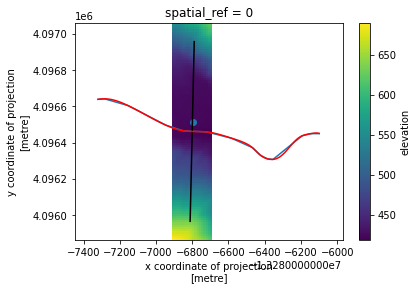

In [17]:


#Buffer bounding box of cross-section otherwise interpolation with elevation below returns nans near end points
xs_line_geom = xs_line.to_crs('epsg:3857')
print(xs_line_geom)
t1 = (xs_line_geom.total_bounds) + ((-100.,-100.,100., 100.))
dem = py3dep.get_map("DEM", tuple(t1), resolution=10, geo_crs="EPSG:3857", crs="epsg:3857")

ax = plt.subplot(111)
strmseg_loc.plot(ax=ax)
xs_line_geom.plot(ax=ax, colors='black')
xs.get_strm_seg_spline().plot(ax=ax, colors='r')
xs_line.envelope.plot(ax=ax, facecolor="none", edgecolor='black')
dem.plot(ax=ax)
gageloc.plot(ax=ax)
ax.axis('equal')
# plt.tight_layout()



/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

<class 'xarray.core.dataarray.DataArray'>


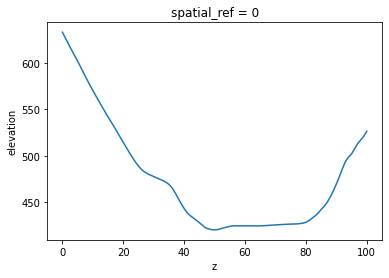

In [18]:


x,y = xs.get_xs_points()
dsx = xr.DataArray(x, dims='z')
dsy = xr.DataArray(y, dims='z')
dsi = dem.interp(x=('z',x), y=('z',y))
dsi.plot()
print(type(dsi))



In [19]:


pdsi = dsi.to_dataframe()
x = dsi.coords['x'].values -dsi.coords['x'].values[0]
y = dsi.coords['y'].values -dsi.coords['y'].values[0]
dist = np.hypot(x,y)
print(dist)
pdsi['distance'] = dist
pdsi



[   0.   10.   20.   30.   40.   50.   60.   70.   80.   90.  100.  110.
  120.  130.  140.  150.  160.  170.  180.  190.  200.  210.  220.  230.
  240.  250.  260.  270.  280.  290.  300.  310.  320.  330.  340.  350.
  360.  370.  380.  390.  400.  410.  420.  430.  440.  450.  460.  470.
  480.  490.  500.  510.  520.  530.  540.  550.  560.  570.  580.  590.
  600.  610.  620.  630.  640.  650.  660.  670.  680.  690.  700.  710.
  720.  730.  740.  750.  760.  770.  780.  790.  800.  810.  820.  830.
  840.  850.  860.  870.  880.  890.  900.  910.  920.  930.  940.  950.
  960.  970.  980.  990. 1000.]


/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

,spatial_ref,x,y,elevation,distance
z,,,,,
0,0,-1.328681e+07,4.095962e+06,633.339990,0.0
1,0,-1.328681e+07,4.095972e+06,626.948502,10.0
2,0,-1.328681e+07,4.095982e+06,620.598415,20.0
3,0,-1.328681e+07,4.095992e+06,614.297748,30.0
4,0,-1.328681e+07,4.096002e+06,608.149387,40.0
...,...,...,...,...,...
96,0,-1.328679e+07,4.096922e+06,507.429310,960.0
97,0,-1.328679e+07,4.096932e+06,513.050287,970.0
98,0,-1.328679e+07,4.096942e+06,516.957682,980.0


In [20]:
values = dsi.values
lmi = np.where(values == max(values[:49]))[0][0]
rmi = np.where(values == max(values[50:]))[0][0]
print(lmi,rmi, values[lmi], values[rmi])

0 100 633.339989603076 526.4339624869898


/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

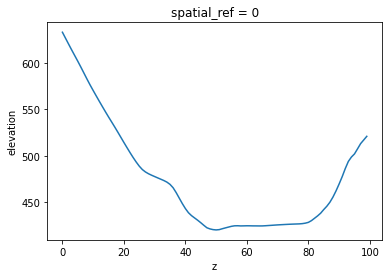

In [21]:
dsi[lmi:rmi].plot()

In [22]:
x = dsi.coords['x'].values[lmi:rmi] -dsi.coords['x'].values[lmi]
y = dsi.coords['y'].values[lmi:rmi] -dsi.coords['y'].values[lmi]
dist = np.hypot(x,y)
elev = dsi.values[lmi:rmi]
tlen = len(dist)
# print(tlen)
sta2 = np.zeros((tlen,2))
t = []
for index,(tx,ty) in enumerate(zip(dist,elev)):
    if not np.isnan(ty):
        a = np.array((tx,ty))
        sta2[index] = a
#         print(a)
    else:
        t.append(index)

/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imax = index.get_loc(maxval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:566: FutureWarning: Passing method to Float64Index.get_loc is deprecated and will raise in a future version. Use index.get_indexer([item], method=...) instead.
  imin = index.get_loc(minval, method="nearest")
/home/sarah/anaconda3/envs/py39/lib/python3.9/site-packages/xarray/core/missing.py:567: FutureWarning: Passing method to Flo

In [23]:
site='11114495'
meas = nwis.get_record(sites=site, service='measurements')
si = nwis.get_record(sites=site, service='site')


In [24]:
meas

,agency_cd,site_no,measurement_nu,measurement_dt,tz_cd,q_meas_used_fg,party_nm,site_visit_coll_agency_cd,gage_height_va,discharge_va,measured_rating_diff,gage_va_change,gage_va_time,control_type_cd,discharge_cd
0,USGS,11114495,1,2001-12-19 10:50:00,PST,Yes,MCS/EWS,USGS,NaN,6.65,Good,NaN,NaN,Clear,NONE
1,USGS,11114495,2,2002-02-27 12:25:00,PST,Yes,EWS,USGS,4.97,5.52,Poor,0.01,1.00,Clear,NONE
2,USGS,11114495,3,2002-03-21 12:00:00,PST,Yes,EWS,USGS,4.94,5.19,Poor,0.00,1.20,Clear,NONE
3,USGS,11114495,4,2002-04-03 13:00:00,PST,Yes,EWS,USGS,4.92,4.63,Poor,0.00,1.00,Clear,NONE
4,USGS,11114495,5,2002-04-25 11:15:00,PDT,Yes,EWS,USGS,4.85,4.15,Poor,0.00,0.70,VegetationLight,NONE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233,USGS,11114495,233,2021-12-29 13:17:05,PST,Yes,NHIGGINSON,USGS,3.15,32.60,Poor,0.04,0.66,Clear,NONE
234,USGS,11114495,234,2021-12-29 14:07:20,PST,Yes,NHIGGINSON,USGS,3.18,34.30,Poor,0.04,0.49,Clear,NONE
235,USGS,11114495,235,2022-01-07 12:17:21,PST,Yes,JSOLUM,USGS,3.05,22.30,Poor,-0.02,0.80,Clear,NONE
236,USGS,11114495,236,2022-01-25 12:36:42,PST,Yes,JSOLUM,USGS,2.83,10.50,Poor,-0.04,0.80,VegetationLight,NONE


In [25]:
si

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,11114495,MATILIJA C NR RES NR MATILIJA HOT SPRINGS CA,ST,343010,1192123,34.502769,-119.357339,M,S,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470600111


In [26]:


meas1 = meas.loc[(meas['measured_rating_diff'].isin(['Good','Fair','Poor']))]
meas1.head()
meas1.reset_index(inplace = True)



/tmp/ipykernel_3883/3713185488.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas1.loc[:,'stage_elev'] = meas1.loc[:,'gage_height_va'].values
/tmp/ipykernel_3883/3713185488.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  meas1.loc[:,'stage_elev'] += si.loc[:,'alt_va'].values
/tmp/ipykernel_3883/3713185488.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

<AxesSubplot:xlabel='discharge_va', ylabel='stage_elev'>

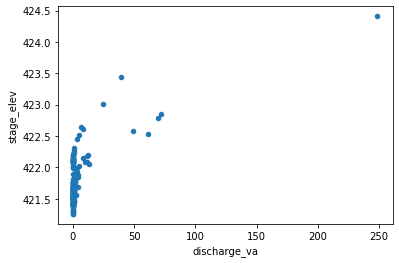

In [27]:


meas1.loc[:,'stage_elev'] = meas1.loc[:,'gage_height_va'].values
# add gage datum to gage measurements
meas1.loc[:,'stage_elev'] += si.loc[:,'alt_va'].values
meas1.loc[:,'stage_elev'] *= 0.3048
meas1.loc[:,'discharge_va'] *= 0.02831
# meas = pd.read_csv('usgs06759500.csv', header=None, names=['stage','discharge'])
ax = plt.subplot(111)
meas1.plot.scatter(x='discharge_va', y='stage_elev', ax = ax)
#plt.scatter(q_values, stage_values, color='black')



NWIS USGS data for ‘measurements’, ‘site info’, ‘annual maximum discharge’ (and return interval), ‘instantaneous’ discharge, and ‘daily’ discharge

In [28]:
site='11114495'
measurements = nwis.get_record(sites=site, service='measurements')
site_info = nwis.get_record(sites=site, service='site')
#annual_maximum_discharge =  nwis.get_record(sites=site, service='site')
instantaneous_discharge = nwis.get_record(sites=site, service='iv', start='2014-12-31', end='2020-01-01')
daily_discharge = nwis.get_record(sites=site, service='dv', start='2014-12-31', end='2020-01-01')
peak_discharge = nwis.get_record(sites=site, service='peaks', start='2014-12-31', end='2020-01-01')

In [29]:
daily_discharge

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2014-12-31 00:00:00+00:00,5.54,A,11114495
2015-01-01 00:00:00+00:00,5.49,A,11114495
2015-01-02 00:00:00+00:00,5.26,A,11114495
2015-01-03 00:00:00+00:00,5.04,A,11114495
2015-01-04 00:00:00+00:00,4.83,A,11114495
...,...,...,...
2019-12-28 00:00:00+00:00,23.20,A,11114495
2019-12-29 00:00:00+00:00,21.30,A,11114495
2019-12-30 00:00:00+00:00,19.90,A,11114495


In [30]:
instantaneous_discharge

,00060,00060_cd,site_no,00065,00065_cd
datetime,,,,,
2014-12-31T00:00:00.000-08:00,5.61,A,11114495,3.09,A
2014-12-31T00:15:00.000-08:00,5.61,A,11114495,3.09,A
2014-12-31T00:30:00.000-08:00,5.61,A,11114495,3.09,A
2014-12-31T00:45:00.000-08:00,5.61,A,11114495,3.09,A
2014-12-31T01:00:00.000-08:00,5.61,A,11114495,3.09,A
...,...,...,...,...,...
2020-01-01T22:45:00.000-08:00,16.60,A,11114495,2.68,A
2020-01-01T23:00:00.000-08:00,17.10,A,11114495,2.69,A
2020-01-01T23:15:00.000-08:00,17.10,A,11114495,2.69,A


In [31]:
site_info

,agency_cd,site_no,station_nm,site_tp_cd,lat_va,long_va,dec_lat_va,dec_long_va,coord_meth_cd,coord_acy_cd,...,local_time_fg,reliability_cd,gw_file_cd,nat_aqfr_cd,aqfr_cd,aqfr_type_cd,well_depth_va,hole_depth_va,depth_src_cd,project_no
0,USGS,11114495,MATILIJA C NR RES NR MATILIJA HOT SPRINGS CA,ST,343010,1192123,34.502769,-119.357339,M,S,...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,470600111


peak_discharge is the peak discharge value for a year

In [32]:
peak_discharge

,agency_cd,site_no,peak_tm,peak_va,peak_cd,gage_ht,gage_ht_cd,year_last_pk,ag_dt,ag_tm,ag_gage_ht,ag_gage_ht_cd
datetime,,,,,,,,,,,,
2016-01-31 00:00:00+00:00,USGS,11114495,NaN,3.5,NaN,3.17,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-17 00:00:00+00:00,USGS,11114495,NaN,7590.0,NaN,11.05,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-09 00:00:00+00:00,USGS,11114495,16:00,NaN,NaN,17.31,7.0,NaN,NaN,NaN,NaN,NaN
2019-02-02 00:00:00+00:00,USGS,11114495,10:15,6600.0,2.0,11.64,NaN,NaN,NaN,NaN,NaN,NaN


Plotring daily discharge vs flow amount (values>500 cfs)

                           00060_Mean 00060_Mean_cd   site_no
datetime                                                     
2017-01-22 00:00:00+00:00       322.0             A  11114495
2017-01-23 00:00:00+00:00       236.0             A  11114495
2017-02-06 00:00:00+00:00       120.0             A  11114495
2017-02-17 00:00:00+00:00      2180.0             A  11114495
2017-02-18 00:00:00+00:00      1490.0             A  11114495
2017-02-19 00:00:00+00:00       393.0             A  11114495
2017-02-20 00:00:00+00:00       279.0             A  11114495
2017-02-21 00:00:00+00:00       216.0             A  11114495
2017-02-22 00:00:00+00:00       175.0             A  11114495
2017-02-23 00:00:00+00:00       143.0             A  11114495
2017-02-24 00:00:00+00:00       120.0             A  11114495
2017-02-25 00:00:00+00:00       104.0             A  11114495
2018-01-09 00:00:00+00:00      1800.0          A, e  11114495
2018-03-21 00:00:00+00:00       105.0          A, e  11114495
2018-03-

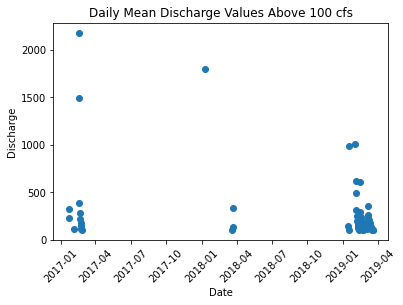

In [36]:

threshold_met = daily_discharge.loc[daily_discharge['00060_Mean'] >= 100]
print(threshold_met)


fig, ax = plt.subplots()
ax.scatter(x= threshold_met.index, y=threshold_met['00060_Mean'])
ax.set_title("Daily Mean Discharge Values Above 100 cfs")
ax.set_xlabel("Date")
ax.set_ylabel("Discharge")
plt.xticks(rotation = 45)
plt.show()

        

Dates of flow above 100 cfs:

In [34]:
dates = [ time.strftime("%Y-%m-%d") for time in threshold_met.index.tolist()]
print(dates)

['2017-01-22', '2017-01-23', '2017-02-06', '2017-02-17', '2017-02-18', '2017-02-19', '2017-02-20', '2017-02-21', '2017-02-22', '2017-02-23', '2017-02-24', '2017-02-25', '2018-01-09', '2018-03-21', '2018-03-22', '2018-03-23', '2019-01-15', '2019-01-17', '2019-01-18', '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05', '2019-02-06', '2019-02-07', '2019-02-08', '2019-02-09', '2019-02-10', '2019-02-11', '2019-02-12', '2019-02-13', '2019-02-14', '2019-02-15', '2019-02-16', '2019-02-17', '2019-02-18', '2019-02-19', '2019-02-20', '2019-02-21', '2019-02-22', '2019-02-23', '2019-03-02', '2019-03-03', '2019-03-04', '2019-03-05', '2019-03-06', '2019-03-07', '2019-03-08', '2019-03-09', '2019-03-10', '2019-03-11', '2019-03-12', '2019-03-13', '2019-03-14', '2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18', '2019-03-19', '2019-03-20']
